In [2]:
import pyforest

In [3]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Task 1 : Descriptive Statistics

In [6]:
temp=train.groupby('Sex')['Age'].min().to_frame().reset_index()
temp=temp.rename(columns={'Age':'min_age'})
temp

,Sex,min_age
0,female,0.75
1,male,0.42


In [7]:
train.shape

(891, 12)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
test.shape

(418, 11)

In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [11]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [12]:
%%time
train.sample(5)

CPU times: total: 0 ns
Wall time: 3.53 ms


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
618,619,1,2,"Becker, Miss. Marion Louise",female,4.0,2,1,230136,39.0000,F4,S
127,128,1,3,"Madsen, Mr. Fridtjof Arne",male,24.0,0,0,C 17369,7.1417,NaN,S
818,819,0,3,"Holm, Mr. John Fredrik Alexander",male,43.0,0,0,C 7075,6.4500,NaN,S
641,642,1,1,"Sagesser, Mlle. Emma",female,24.0,0,0,PC 17477,69.3000,B35,C
573,574,1,3,"Kelly, Miss. Mary",female,NaN,0,0,14312,7.7500,NaN,Q


In [13]:
%timeit test.sample(5)

284 μs ± 28.7 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [14]:
passengerid = test.PassengerId

In [15]:
#train.drop(['PassengerId'],axis=1,inplace=True)
#test.drop(['PassengerId'],axis=1,inplace=True)
print(train.info())
print('-'*40)
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pass

In [16]:
def missing_percentage(df):
    total=df.isnull().sum().sort_values(ascending=False)
    percent=round((df.isnull().sum().sort_values(ascending=False)/len(df))*100,2)
    return pd.concat([total,percent],axis=1,keys=['Total','Percentage'])

In [17]:
missing_percentage(train)

<IPython.core.display.Javascript object>

,Total,Percentage
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22
PassengerId,0,0.00
Survived,0,0.00
Pclass,0,0.00
Name,0,0.00
Sex,0,0.00
SibSp,0,0.00
Parch,0,0.00


In [18]:
missing_percentage(test)

<IPython.core.display.Javascript object>

,Total,Percentage
Cabin,327,78.23
Age,86,20.57
Fare,1,0.24
PassengerId,0,0.00
Pclass,0,0.00
Name,0,0.00
Sex,0,0.00
SibSp,0,0.00
Parch,0,0.00
Ticket,0,0.00


In [19]:
def percent_value_counts(df,feature):
    percent = pd.DataFrame(round(df.loc[:,feature].value_counts(dropna=False, normalize=True)*100,2))
    total = pd.DataFrame(df.loc[:,feature].value_counts(dropna=False))
    total.columns = ["Total"]
    percent.columns = ['Percent']
    return pd.concat([total, percent], axis = 1)


In [20]:
percent_value_counts(train,'Embarked')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Total,Percent
Embarked,,
S,644,72.28
C,168,18.86
Q,77,8.64
NaN,2,0.22


In [21]:
train[train.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\shali\AppData\Local\Temp\ipykernel_11700\1870771269.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


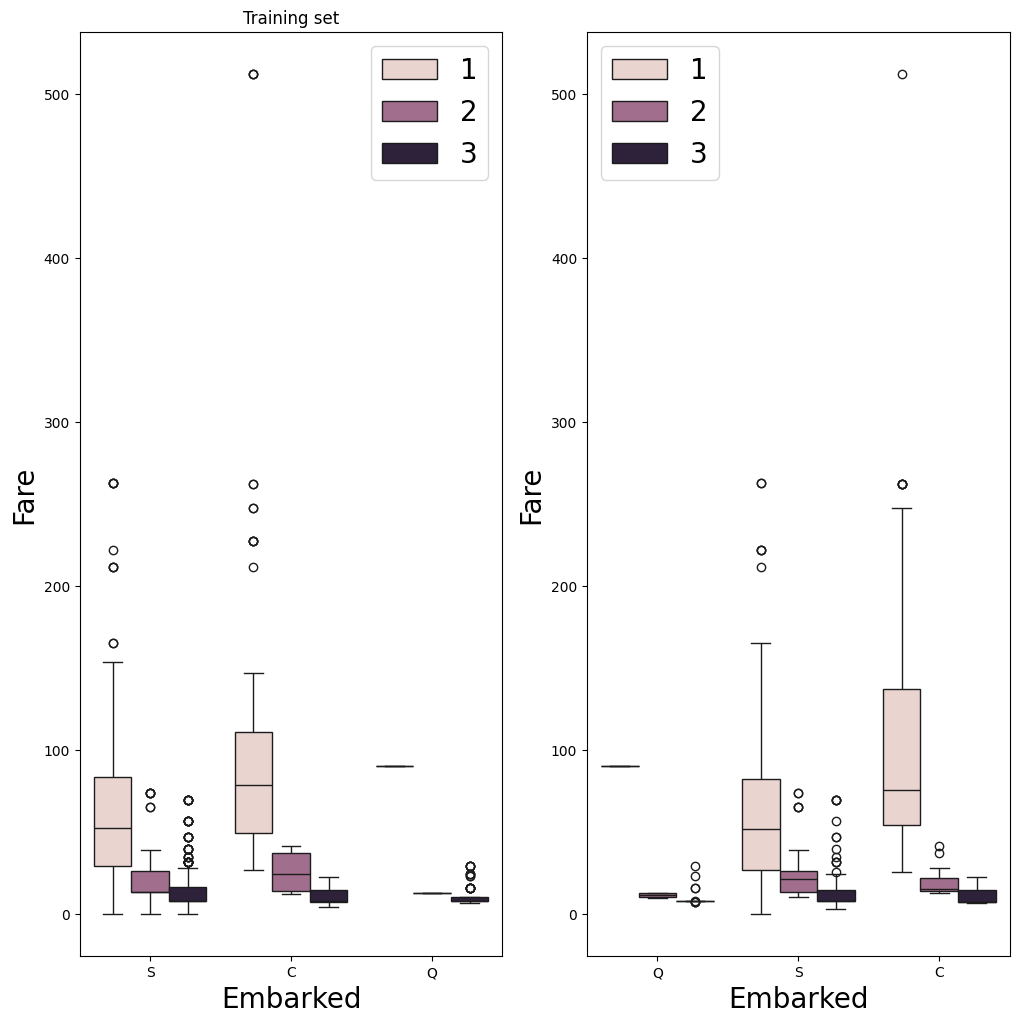

In [22]:
fig,ax=plt.subplots(figsize=(12,12),ncols=2)
ax1=sns.boxplot(x='Embarked',y='Fare',hue='Pclass',data=train,ax=ax[0])
ax2=sns.boxplot(x='Embarked',y='Fare',hue='Pclass',data=test,ax=ax[1])
ax1.set_title("Training set")
ax1.set_xlabel('Embarked',fontsize=20)
ax2.set_xlabel('Embarked',fontsize=20)
ax1.set_ylabel('Fare',fontsize=20)
ax2.set_ylabel('Fare',fontsize=20)
ax1.legend(fontsize=20)
ax2.legend(fontsize=20)
fig.show()


In [23]:
train.Embarked.fillna('C',inplace=True)

C:\Users\shali\AppData\Local\Temp\ipykernel_11700\2140752374.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train.Embarked.fillna('C',inplace=True)


In [24]:
print("Train Cabin missing: " + str(train.Cabin.isnull().sum()/len(train.Cabin)))
print("Test Cabin missing: " + str(test.Cabin.isnull().sum()/len(test.Cabin)))

Train Cabin missing: 0.7710437710437711
Test Cabin missing: 0.7822966507177034


In [25]:
survivers=train.Survived
train.drop(['Survived'],axis=1, inplace=True)
all_data=pd.concat([train,test],axis=0,ignore_index=False)
all_data.Cabin.fillna('N',inplace=True)

<IPython.core.display.Javascript object>

C:\Users\shali\AppData\Local\Temp\ipykernel_11700\3725140891.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  all_data.Cabin.fillna('N',inplace=True)


In [26]:
all_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N,S


In [27]:
all_data['Cabin']=[i[0] for i in all_data['Cabin']]

In [28]:
percent_value_counts(all_data,'Cabin')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Total,Percent
Cabin,,
N,1014,77.46
C,94,7.18
B,65,4.97
D,46,3.51
E,41,3.13
A,22,1.68
F,21,1.60
G,5,0.38
T,1,0.08


In [29]:
all_data.groupby('Cabin')['Fare'].mean().sort_values()

Cabin
G     14.205000
F     18.079367
N     19.132707
T     35.500000
A     41.244314
D     53.007339
E     54.564634
C    107.926598
B    122.383078
Name: Fare, dtype: float64

In [30]:
def Cabin_estimate(i):
    a=0
    if i<16:
        a='G'
    elif i>=16 and i<27:
        a='F'
    elif i>=27 and i<38:
        a='T'
    elif i>=38 and i<47:
        a='A'
    elif i>=47 and i<53:
        a='E'
    elif i>=53 and i<54:
        a='D'
    elif i>=54 and i<116:
        a='C'
    else:
        a='B'
    return a

In [31]:
with_N=all_data[all_data.Cabin=='N']
without_N=all_data[all_data.Cabin!='N']

In [32]:
with_N.Cabin=with_N.Fare.apply(lambda x:Cabin_estimate(x))
all_data=pd.concat([with_N,without_N],axis=0)
all_data.sort_values(by='PassengerId',inplace=True)
train=all_data[:891]
test=all_data[891:]
train['Survived']=survivers

C:\Users\shali\AppData\Local\Temp\ipykernel_11700\4257024927.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  with_N.Cabin=with_N.Fare.apply(lambda x:Cabin_estimate(x))


<IPython.core.display.Javascript object>

C:\Users\shali\AppData\Local\Temp\ipykernel_11700\4257024927.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Survived']=survivers


In [33]:
train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,G,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,G,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,G,S,0


In [34]:
test[test.Fare.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,B,S


In [35]:
missing_value=test[(test.Pclass==3) & (test.Embarked=='S') & (test.Sex=='male')].Fare.mean()
test.Fare.fillna(missing_value,inplace=True)

C:\Users\shali\AppData\Local\Temp\ipykernel_11700\3330345470.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test.Fare.fillna(missing_value,inplace=True)
C:\Users\shali\AppData\Local\Temp\ipykernel_11700\3330345470.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.Fare.fillna(missing_value,inplace=True)


In [36]:
print("Train age missing value proportion: " + str(train.Age.isnull().sum()/len(train)))
print("Test age missing value proportion: " + str(test.Age.isnull().sum()/len(test)))

Train age missing value proportion: 0.19865319865319866
Test age missing value proportion: 0.20574162679425836


Gender and Survived

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\shali\AppData\Local\Temp\ipykernel_11700\1163138450.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "Sex", y = "Survived",data=train, palette = palette,linewidth=5,order = ['female','male'], capsize=0.05)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

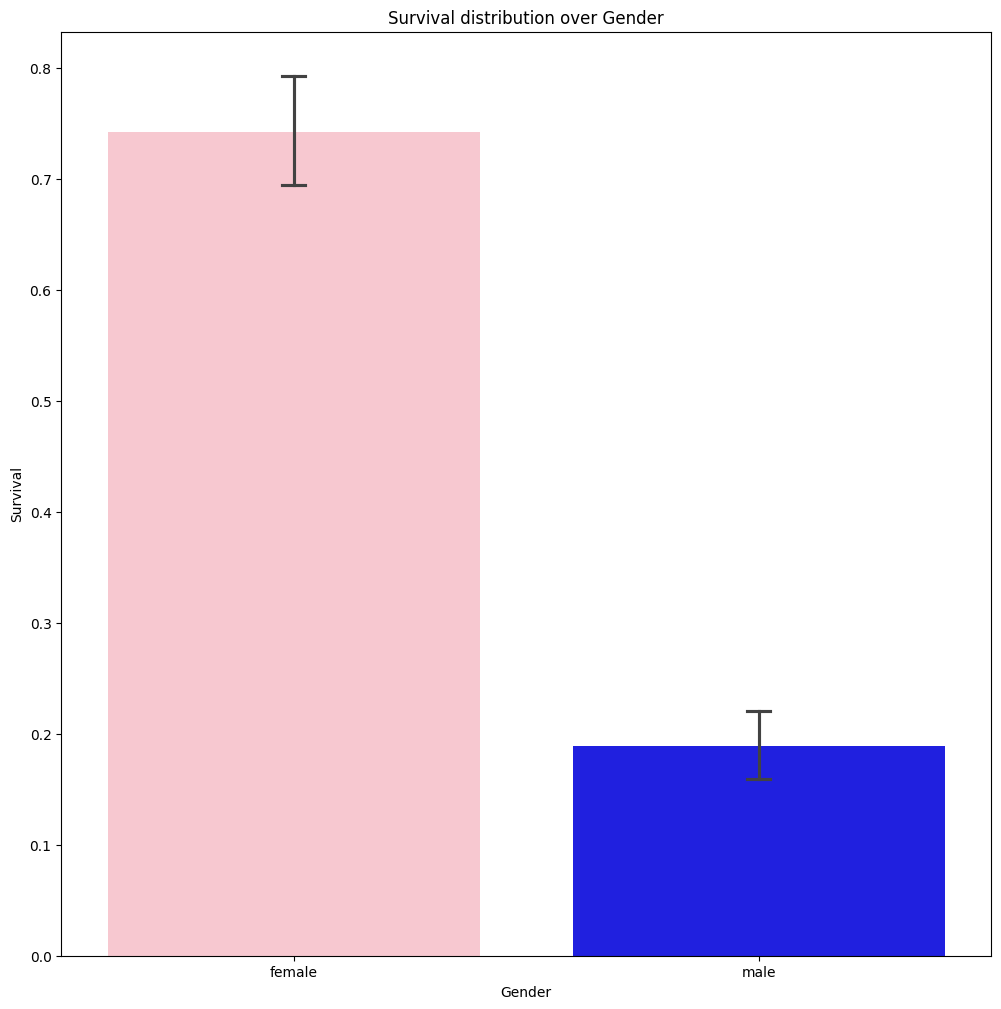

In [37]:
palette={'male':'blue','female':'pink'}
plt.figure(figsize=(12,12))
sns.barplot(x = "Sex", y = "Survived",data=train, palette = palette,linewidth=5,order = ['female','male'], capsize=0.05)
plt.title("Survival distribution over Gender")
plt.xlabel("Gender")
plt.ylabel("Survival")
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

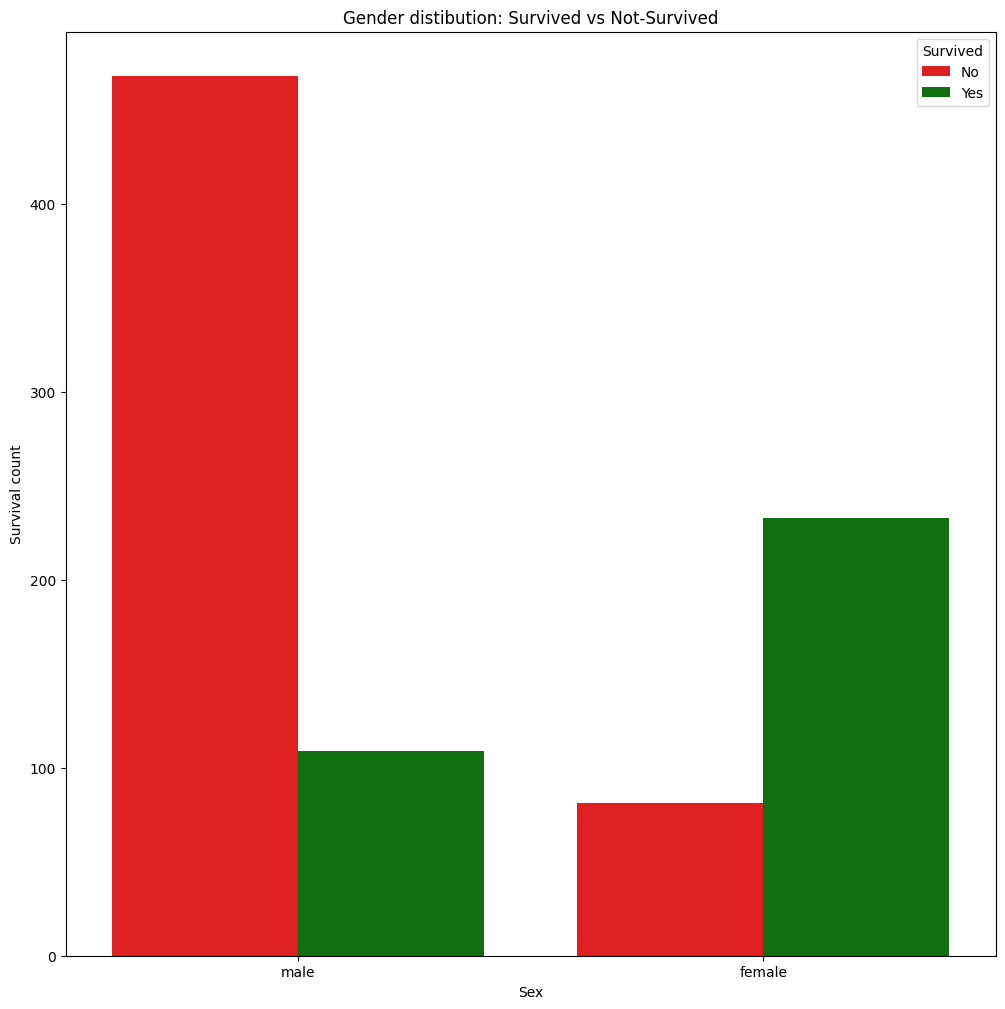

In [38]:
pal={1:'green',0:'red'}
plt.figure(figsize=(12,12))
legend={1:"Yes",0:"No"}
ax=sns.countplot(x='Sex',hue='Survived',data=train,linewidth=4,palette=pal)
plt.title("Gender distibution: Survived vs Not-Survived")
plt.xlabel('Sex')
plt.ylabel('Survival count')
leg=ax.get_legend()
leg.set_title("Survived")
for text in leg.texts:
    label=int(text.get_text())
    text.set_text(legend[label])
plt.show()


Pclass and Survived

In [39]:
tem=train[['Pclass','Survived','PassengerId']].groupby(['Pclass','Survived']).count().reset_index()
tem

,Pclass,Survived,PassengerId
0,1,0,80
1,1,1,136
2,2,0,97
3,2,1,87
4,3,0,372
5,3,1,119


In [40]:
tem_df=pd.pivot_table(tem,values='PassengerId',index='Pclass',columns='Survived')
tem_df.columns=['No','Yes']
tem_df

<IPython.core.display.Javascript object>

,No,Yes
Pclass,,
1,80.0,136.0
2,97.0,87.0
3,372.0,119.0


In [41]:
totals=[i+j for i,j in zip(tem_df['No'],tem_df['Yes'])]
No_s=[i/j*100 for i,j in zip(tem_df['No'],totals)]
Yes_s=[i/j*100 for i,j in zip(tem_df['Yes'], totals)]
print("No_s: ",No_s)
print("Yes_s:",Yes_s)

No_s:  [37.03703703703704, 52.71739130434783, 75.76374745417516]
Yes_s: [62.96296296296296, 47.28260869565217, 24.236252545824847]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

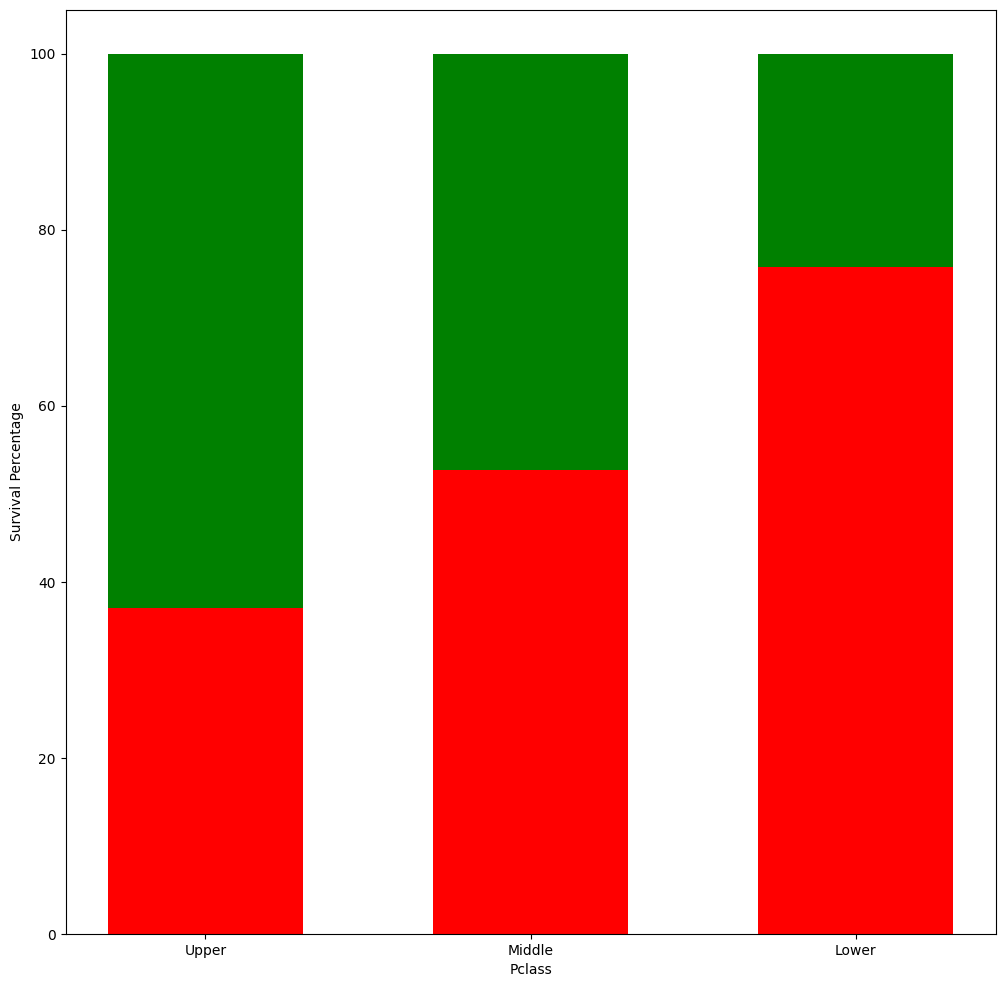

In [42]:
r=[0,1,2]
plt.figure(figsize=(12,12))
plt.bar(r,No_s,color='red',width=0.6)
plt.bar(r,Yes_s,bottom=No_s,color='green',width=0.6)
names=('Upper','Middle','Lower')
plt.xticks(r,names)
plt.xlabel("Pclass")
plt.ylabel("Survival Percentage")
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

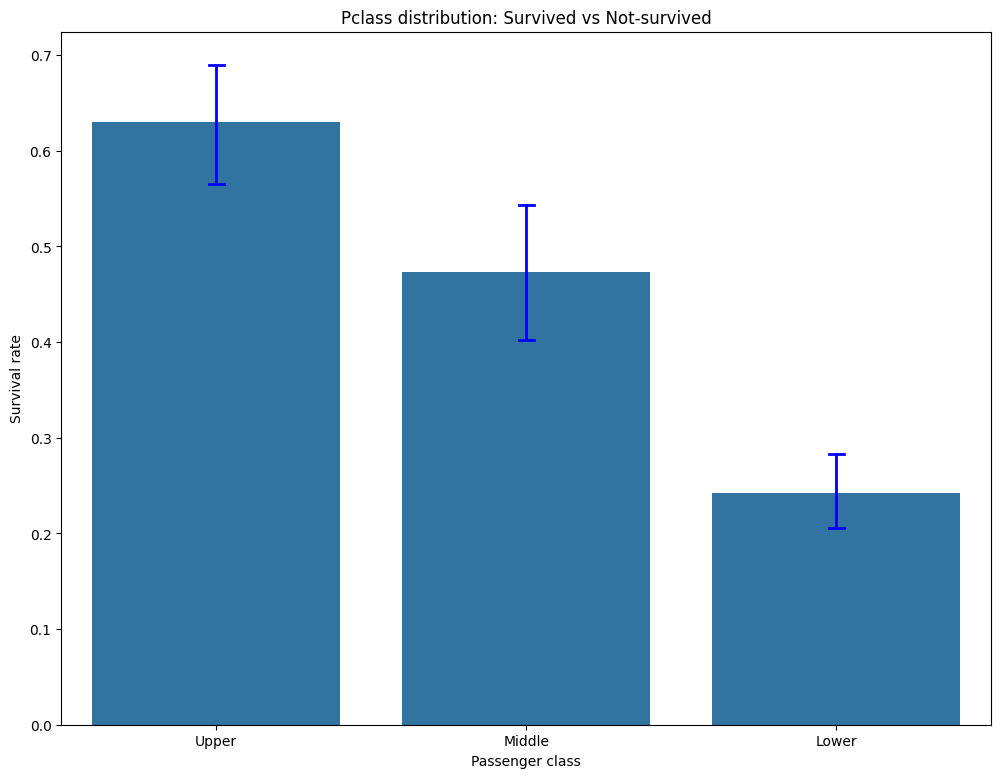

In [43]:
plt.figure(figsize=(12,9))
sns.barplot(x='Pclass',y='Survived',data=train,capsize=0.05,err_kws={'color':'blue','linewidth':2})
plt.title('Pclass distribution: Survived vs Not-survived')
plt.xlabel('Passenger class')
plt.ylabel('Survival rate')
plt.xticks(r,names)
plt.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

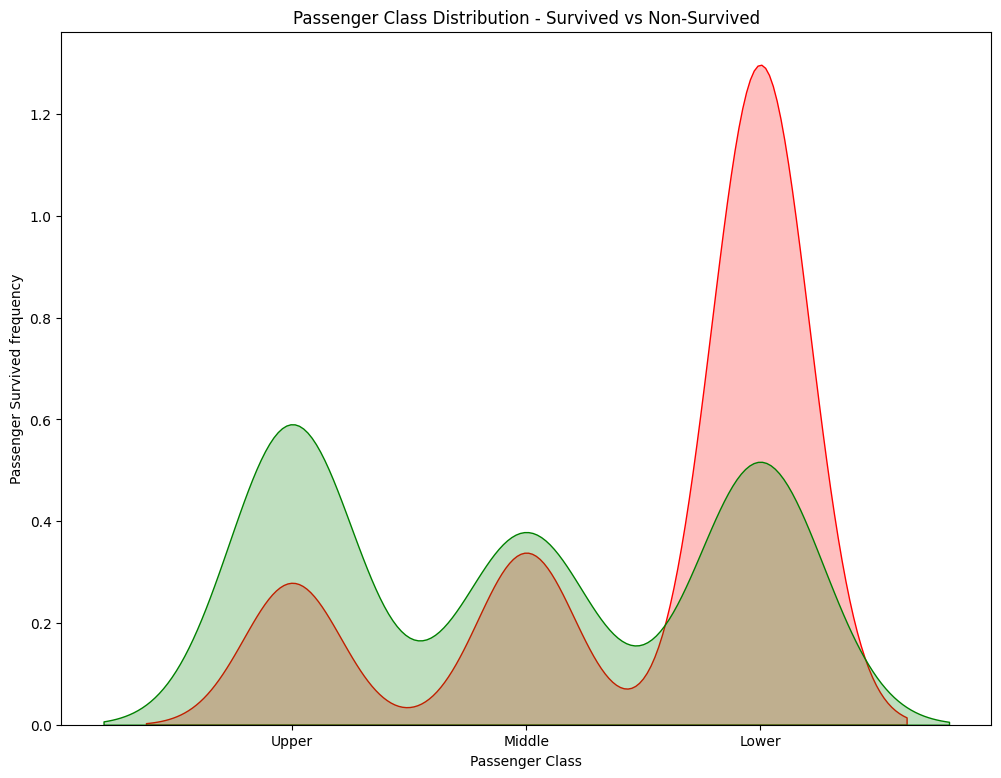

In [44]:
fig=plt.figure(figsize=(12,9))
ax=sns.kdeplot(train.Pclass[train.Survived==0], color='red',fill=True,label='Not survived')
ax=sns.kdeplot(train.Pclass[train.Survived==1], color='green',fill=True,label='Survived')
plt.title('Passenger Class Distribution - Survived vs Non-Survived')
plt.xlabel("Passenger Class")
plt.ylabel("Passenger Survived frequency")
plt.xticks(sorted(train.Pclass.unique()),names)
plt.show()

Fare and Survived

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

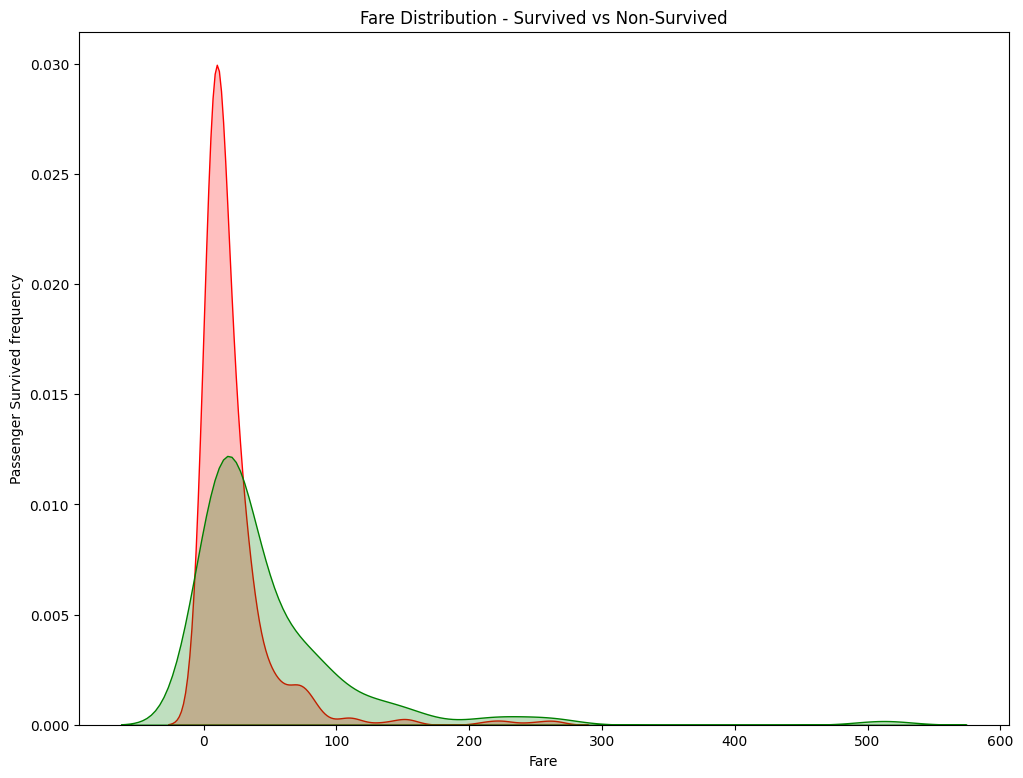

In [45]:
fig=plt.figure(figsize=(12,9))
ax=sns.kdeplot(train.Fare[train.Survived==0], color='red',fill=True,label='Not survived')
ax=sns.kdeplot(train.Fare[train.Survived==1], color='green',fill=True,label='Survived')
plt.title('Fare Distribution - Survived vs Non-Survived')
plt.xlabel("Fare")
plt.ylabel("Passenger Survived frequency")
plt.show()

In [46]:
train[train.Fare>280]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
258,259,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,B,C,1
679,680,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B,C,1
737,738,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B,C,1


Age and Survived

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

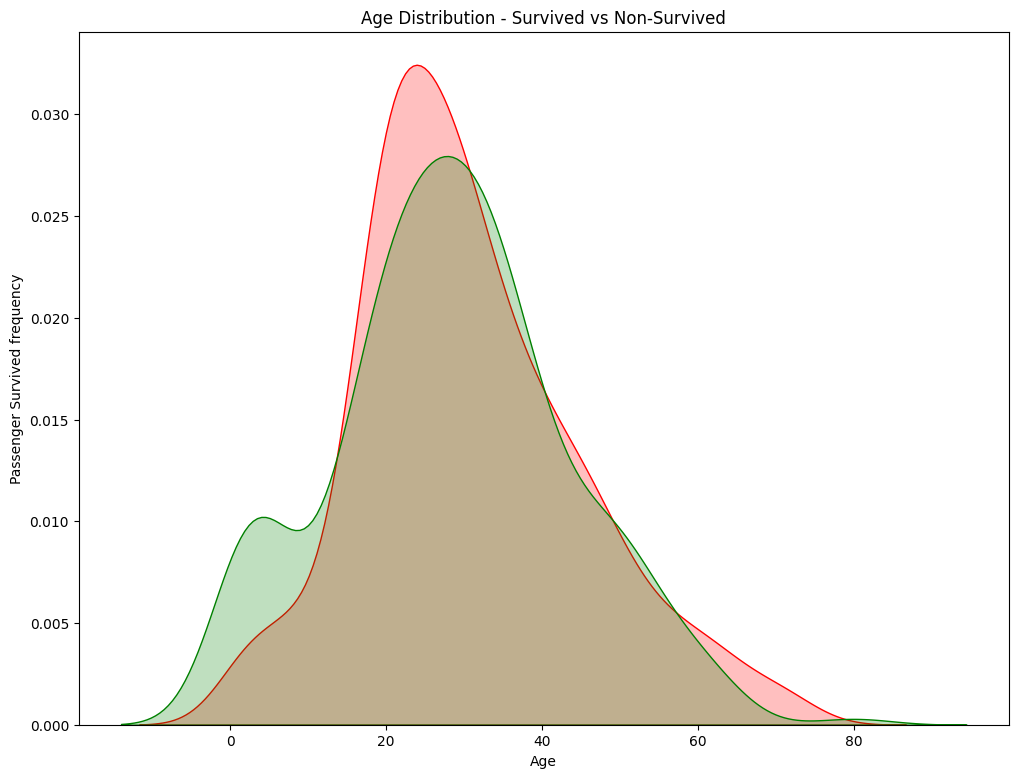

In [47]:
fig=plt.figure(figsize=(12,9))
ax=sns.kdeplot(train.Age[train.Survived==0], color='red',fill=True,label='Not survived')
ax=sns.kdeplot(train.Age[train.Survived==1], color='green',fill=True,label='Survived')
plt.title('Age Distribution - Survived vs Non-Survived')
plt.xlabel("Age")
plt.ylabel("Passenger Survived frequency")
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

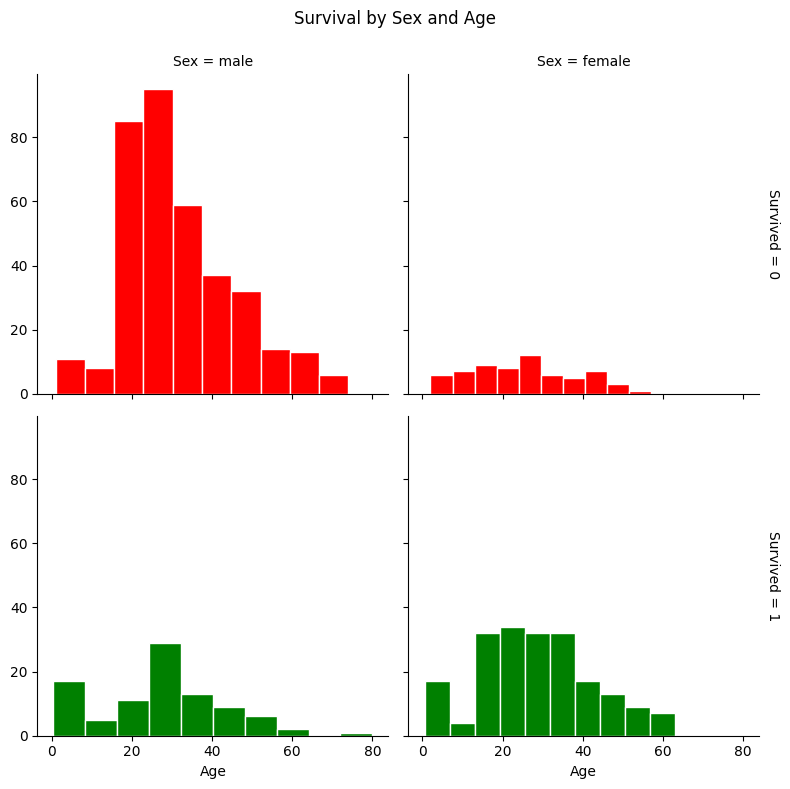

In [48]:
colors={1:'green',0:'red'}
grid=sns.FacetGrid(train,height=4,col='Sex',row='Survived',margin_titles=True,hue='Survived',palette=colors)
grid=grid.map(plt.hist,'Age',edgecolor='white')
grid.fig.suptitle("Survival by Sex and Age")
plt.subplots_adjust(top=0.9)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

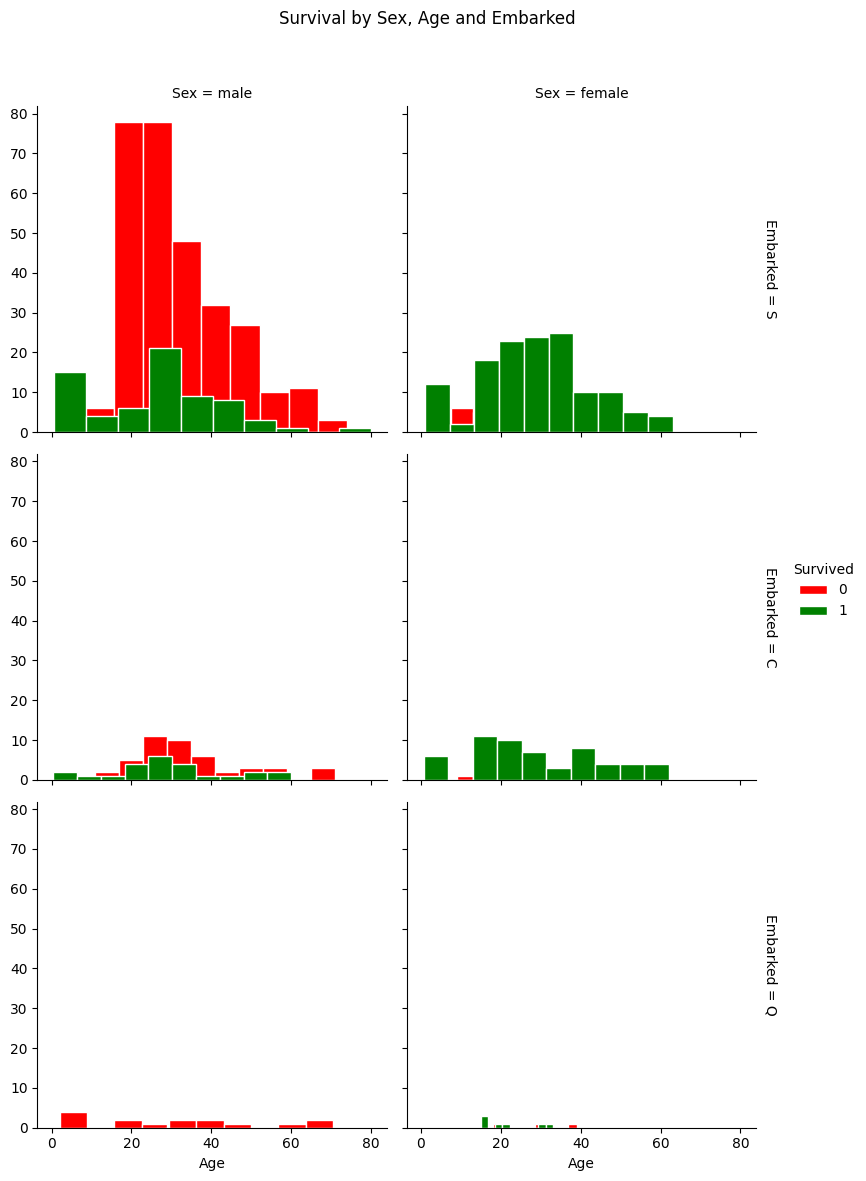

In [49]:
g=sns.FacetGrid(train,height=4,col='Sex',row='Embarked',margin_titles=True,hue='Survived',palette=colors)
g=g.map(plt.hist,'Age',edgecolor='white').add_legend()
g.fig.suptitle("Survival by Sex, Age and Embarked")
plt.subplots_adjust(top=0.9)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

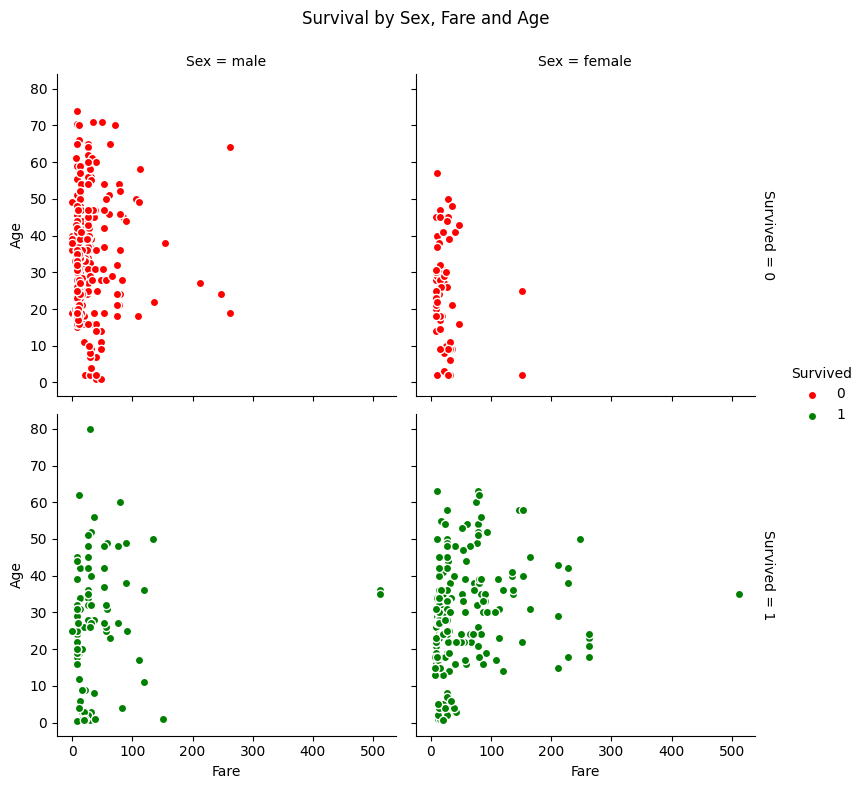

In [50]:
gr=sns.FacetGrid(train,height=4,col='Sex',row='Survived',margin_titles=True,hue='Survived',palette=colors)
gr=gr.map(plt.scatter, 'Fare','Age',edgecolor='white').add_legend()
gr.fig.suptitle("Survival by Sex, Fare and Age")
plt.subplots_adjust(top=0.9)
plt.show()

In [51]:
train=train[train.Fare<500]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

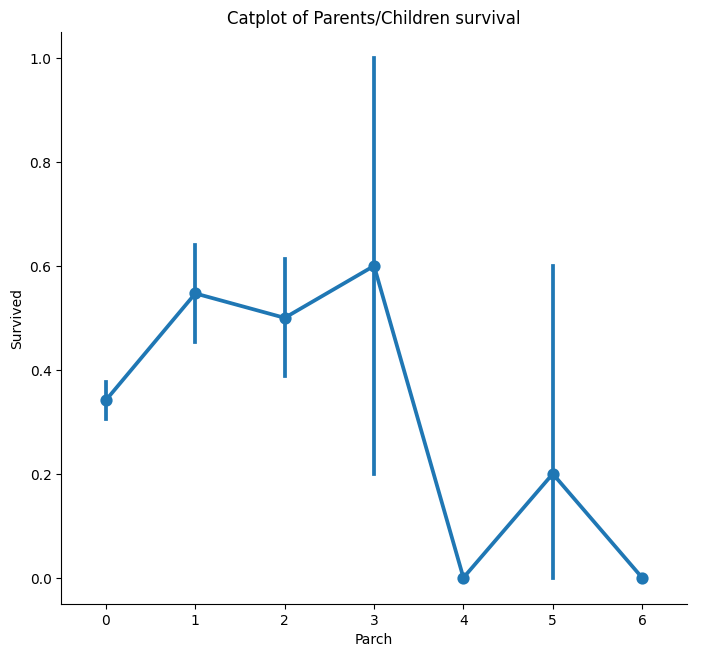

In [52]:
sns.catplot(x='Parch',y='Survived',kind='point',data=train,height=7)
plt.title("Catplot of Parents/Children survival")
plt.subplots_adjust(top=0.9)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

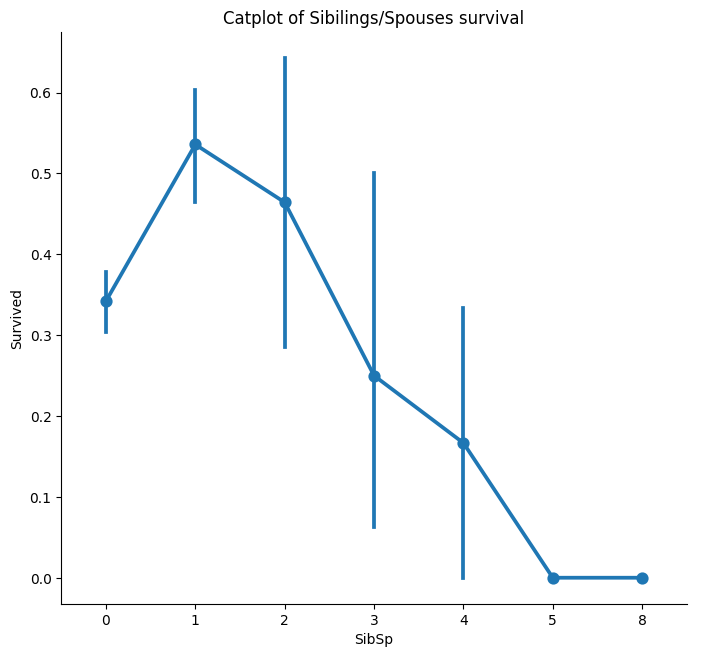

In [53]:
sns.catplot(x='SibSp',y='Survived',kind='point',data=train,height=7)
plt.title("Catplot of Sibilings/Spouses survival")
plt.subplots_adjust(top=0.9)
plt.show()

In [54]:
train['Sex'] = train.Sex.apply(lambda x: 0 if x == "female" else 1)
test['Sex'] = test.Sex.apply(lambda x: 0 if x == "female" else 1)

C:\Users\shali\AppData\Local\Temp\ipykernel_11700\598072783.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Sex'] = train.Sex.apply(lambda x: 0 if x == "female" else 1)
C:\Users\shali\AppData\Local\Temp\ipykernel_11700\598072783.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Sex'] = test.Sex.apply(lambda x: 0 if x == "female" else 1)


Statistics

In [55]:
train.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
count,888.000000,888.000000,888.000000,711.000000,888.000000,888.000000,888.000000,888.000000
mean,445.618243,2.313063,0.647523,29.675345,0.524775,0.381757,30.582164,0.381757
std,257.405474,0.834007,0.478011,14.552495,1.104186,0.806949,41.176366,0.486091
min,1.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,222.750000,2.000000,0.000000,20.000000,0.000000,0.000000,7.895800,0.000000
50%,445.500000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,667.250000,3.000000,1.000000,38.000000,1.000000,0.000000,30.771850,1.000000
max,891.000000,3.000000,1.000000,80.000000,8.000000,6.000000,263.000000,1.000000


In [56]:
train.describe(include =['O'])

,Name,Ticket,Cabin,Embarked
count,888,888,888,888
unique,888,680,8,3
top,"Braund, Mr. Owen Harris",347082,G,S
freq,1,7,464,644


In [57]:
survived_summary=train.groupby('Survived')
survived_summary.mean(numeric_only=True).reset_index()

,Survived,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,447.016393,2.531876,0.852459,30.626179,0.553734,0.329690,22.117887
1,1,443.353982,1.958702,0.315634,28.270627,0.477876,0.466077,44.289799


In [58]:
survived_summary=train.groupby('Sex')
survived_summary.mean(numeric_only=True).reset_index()

,Sex,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
0,0,431.578275,2.162939,27.888462,0.696486,0.651757,42.985091,0.741214
1,1,453.260870,2.394783,30.705477,0.431304,0.234783,23.830658,0.186087


In [59]:
survived_summary=train.groupby('Pclass')
survived_summary.mean(numeric_only=True).reset_index()

,Pclass,PassengerId,Sex,Age,SibSp,Parch,Fare,Survived
0,1,460.225352,0.563380,38.280984,0.422535,0.356808,78.124061,0.624413
1,2,445.956522,0.586957,29.877630,0.402174,0.380435,20.662183,0.472826
2,3,439.154786,0.706721,25.140620,0.615071,0.393075,13.675550,0.242363


Correlations

In [60]:
pd.DataFrame(train.corr(numeric_only=True)['Survived'].sort_values(ascending=False))

<IPython.core.display.Javascript object>

,Survived
Survived,1.000000
Fare,0.261742
Parch,0.082157
PassengerId,-0.006916
SibSp,-0.033395
Age,-0.079472
Pclass,-0.334068
Sex,-0.545899


In [61]:
corr=train.corr(numeric_only=True)**2
corr.Survived.sort_values(ascending=False)

Survived       1.000000
Sex            0.298006
Pclass         0.111601
Fare           0.068509
Parch          0.006750
Age            0.006316
SibSp          0.001115
PassengerId    0.000048
Name: Survived, dtype: float64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

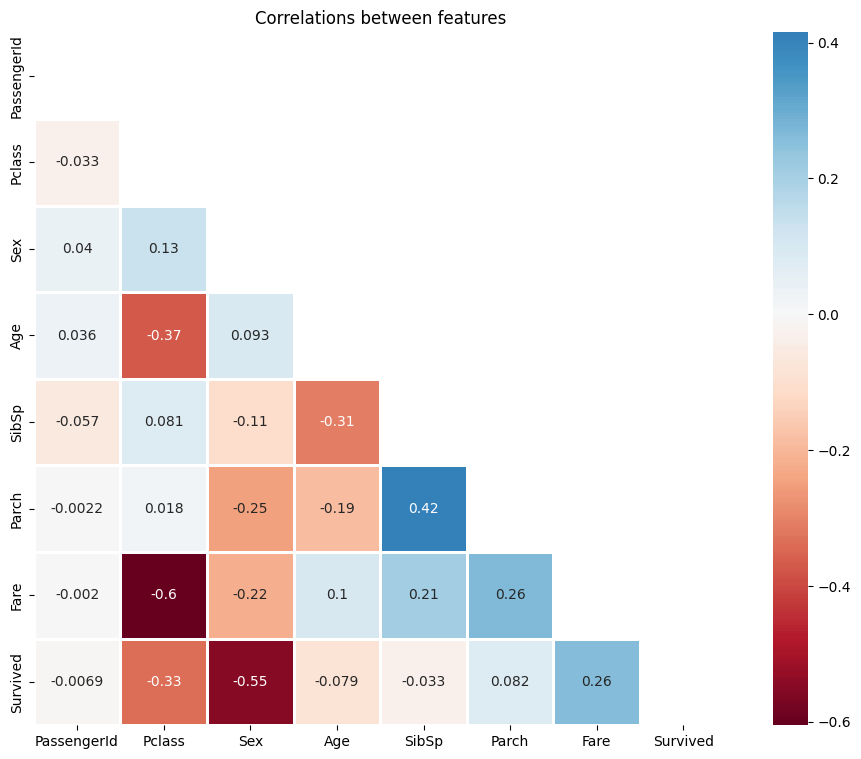

In [62]:
mask=np.zeros_like(train.corr(numeric_only=True),dtype=bool)
mask[np.triu_indices_from(mask)]=True
plt.figure(figsize=(12,9))
sns.heatmap(train.corr(numeric_only=True),annot=True,mask=mask,cmap='RdBu',linewidths=0.9,linecolor='white',fmt='0.2g',center=0,square=True)
plt.title('Correlations between features')
plt.show()

Task 2: Inferential Statistics

In [65]:
male_mean=train[train['Sex']==1].Survived.mean()
female_mean=train[train['Sex']==0].Survived.mean()
difference=female_mean-male_mean
print("Male survival mean: ", male_mean)
print("Female survival mean: ", female_mean)
print("Mean difference of survival between male and female: ", difference)

Male survival mean:  0.18608695652173912
Female survival mean:  0.7412140575079872
Mean difference of survival between male and female:  0.5551271009862481


In [67]:
import random

In [68]:
male=train[train['Sex']==1]
female=train[train['Sex']==0]

In [71]:
np.random.seed(40)
m_mean_samples=[]
f_mean_samples=[]
for i in range(50):
    m_mean_samples.append(np.mean(random.sample(list(male['Survived']),50)))
    f_mean_samples.append(np.mean(random.sample(list(female['Survived']),50)))
print (f"Male mean sample mean: {round(np.mean(m_mean_samples),2)}")
print (f"Female mean sample mean: {round(np.mean(f_mean_samples),2)}")
print (f"Difference between male and female mean sample mean: {round(np.mean(f_mean_samples) - np.mean(m_mean_samples),2)}")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Male mean sample mean: 0.19


<IPython.core.display.Javascript object>

Female mean sample mean: 0.74


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Difference between male and female mean sample mean: 0.55


z-test

In [72]:
from statsmodels.stats.weightstats import ztest

In [73]:
alpha=0.05
z,p=ztest(m_mean_samples,f_mean_samples)
print("Null Hypothesis: There is a substantial difference in the survival rate between the male and female passengers")
print("Alternate Hypothesis: There is no substantial difference in the survival rate between the male and female passengers")
print(f'z value={z:.2f}\np value={p:.2f}')
if p<alpha:
    print("Null Hypothesis accepted")
else:
    print("Null Hypothesis rejected")

Null Hypothesis: There is a substantial difference in the survival rate between the male and female passengers
Alternate Hypothesis: There is no substantial difference in the survival rate between the male and female passengers
z value=-57.24
p value=0.00
Null Hypothesis accepted


t-test

In [74]:
from scipy.stats import ttest_ind

In [75]:
t_stat,p_val=ttest_ind(m_mean_samples,f_mean_samples,equal_var=False)
print("Null Hypothesis: There is a substantial difference in the survival rate between the male and female passengers")
print("Alternate Hypothesis: There is no substantial difference in the survival rate between the male and female passengers")
print(f't value={t_stat:.2f}\np value={p_val:.2f}')
if p<alpha:
    print("Null Hypothesis accepted")
else:
    print("Null Hypothesis rejected")

Null Hypothesis: There is a substantial difference in the survival rate between the male and female passengers
Alternate Hypothesis: There is no substantial difference in the survival rate between the male and female passengers
t value=-57.24
p value=0.00
Null Hypothesis accepted


t-test

In [84]:
survived = train[train['Survived'] == 1]['Sex']
not_survived = train[train['Survived'] == 0]['Sex']

t_stat, p_val = ttest_ind(survived, not_survived, equal_var=False)

print("t-stat:", round(t_stat, 3))
print("p-value:", round(p_val, 5))
print("Null Hypothesis: There is a significant difference in the mean sex between the passenger who survived and passenger who did not survive")
print("Alternate Hypothesis: There is no significant difference in the mean sex between the passenger who survived and passenger who did not survive")
if p<alpha:
    print("Null Hypothesis accepted")
else:
    print("Null Hypothesis rejected")


t-stat: -18.215
p-value: 0.0
Null Hypothesis: There is a significant difference in the mean sex between the passenger who survived and passenger who did not survive
Alternate Hypothesis: There is no significant difference in the mean sex between the passenger who survived and passenger who did not survive
Null Hypothesis accepted
